# Is Antimicrobial Resistance Increasing?
# Data Science Prep Course: Capstone Data Analysis Report  
# Github: https://github.com/richardgorham1/ds-prep-capstone.git

## Summary
The World Health Organization has found increase in antimicrobial resistance in every region of the world. Antimicrobial resistance contributes to 23,000 deaths per year in the US and 25,000 deaths per year in the EU. High proportion of resistance is found in all world regions. Over use of antimicrobial drugs have led to the proliferation of resistant bacteria. The National Antimicrobial Resistance Monitoring System has been tracking the incidences of antimicrobial resistance since the mid 1990's. Analysis of the enteric bacteria dataset seems to show that the incidence of resistance is increasing starting from 2010. The data does not address the prevalence of resistance in the ecosystems, as specimens were only collected once a disease was observed. The database includes some information on the plasmid markers that express resistance, these sequences along with others known can be aligned to sequences in the American Gut Biome database to develop an understanding of the potential prevalence of resistance. 
<img src = './images/resistance.png' />
In this chart the proportion of enteric bacteria resistant to one or more antimicrobials is plotted against the year isolated. On average, about 8% of enteric bacteria are resistance to some antimicrobial. Though the last three years there is indication that resistance is increasing, a short trend increasing and the last point is greater that 3 standard deviations from the mean.
<font size = 1.5>World Health Organization. Antimicrobial resistance: global report on surveillance.
World Health Organization 2014</font>

## Introduction
Data Set: National Antimicrobial Resistance Monitoring System for Enteric Bacteria (NARMS) https://wwwn.cdc.gov/narmsnow/¶  
Data set size - 54352 columns, 106 rows

###  Microbial Resistance
Antimicrobial resistance is thought to occur due to selection pressure from the wide spread use of antibiotics. Three steps detail selected pressure. First, an infection is observed. Second the infection is treated by an antibiotic. Third, some very small fraction of organisms, exposed to the antibiotic, are not inactivated but rather develop a resistant response or an ability to tolerate the substance. Also, agricultural practices create analogous selection pressures. First, bacterial infections are a concern to agriculturalists. Second, antibiotics are given to animals as prophylactics.  Third, some (very small fraction of) organisms develop a resistant response. Not only can the now resistant organisms increase in number with respect to the general population, they can also pass along the characteristic. Resistance is generally encoded in a genetic structure, separate from the chromosomal DNA, called a plasmid. Plasmids are replicated through binary fission and they can be transferred between bacteria of the same or of different species. Beceiro _et. al._  (2013) propose that the mechanisms for virulence are closely tied to antimicrobial resistance. Given these conditions, an increase in antimicrobial resistance is expected. 
<font size=1.5>Beceiro, A., Tomás, M., & Bou, G. (2013). Antimicrobial Resistance and Virulence: a Successful or Deleterious Association in the Bacterial World? Clinical Microbiology Reviews, 26(2), 185–230. http://doi.org/10.1128/CMR.00059-12</font>  

### National Antimicrobial Resistance Monitoring System  
The National Antimicrobial Resistance Monitoring System is a collaborative program of the US Food and Drug Administration (FDA), the Centers for Disease Control (CDC), US Department of Agriculture (USDA), and state and local public health departments. The program monitors the incidences of antimicrobial resistance in communicable and non-communicable pathogens from all transmission routes. The dataset in this study is specifically four genera of enteric bacteria most commonly transmitted through food.

### Potential Issues with the Dataset
###### Note 1
Data from 1996 through 2002 may not be representative of nationwide trends. Data collected began in 1996 and continues through the present. From 1996 through 2002, only 14 states participated, in 2003 the program was expanded nationwide. 
###### Note 2
Data may suffer from selection bias. Data is collected based on incidences of foodborne illness outbreaks large enough to illicit a public health investigation.  This data may overestimate the rate of antimicrobial resistance.
###### Note 3
The number of specimens collected and the population of the US both increased during the monitoring period. Any increase in antimicrobial resistance could be due in whole or in part to these trends, rather than an increase in prevalence.

### A Note on isolates  
Campylobacter, Escherichia, Salmonella, and Shigella are the monitored bacteria. Each is a gram-negative, facultative anaerobe that cause intestinal disease in humans and animals. Each is transmitted through fecal-oral contact, or by eating or drinking contaminated food or water. Species and serotypes have varying degrees of virulence, are generally non-fatal, though more threatening to young children, older adults, or immunocompromised individuals.

## Methods 

### Functions and Modules

In [1]:
#custom functions used
import lib.data as d  
import lib.US_Population_1996_2015 as usp
import lib.set_1 as s1
import lib.regression_4_by_4 as rch
import lib.resistance_level as rl
import lib.regression_and_p_chart as rp
import lib.residual_analysis as ra
import lib.least_squares as ls
import lib.pred_interval_95 as pred

#standard modules
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
%matplotlib inline

### Base data

In [2]:
df = d.data('IsolateData.csv')
pop = usp.US_Population_1996_2015('US_Population.csv')

The data frame contains 54352 rows and 106 columns. The data types of the 106 columns are 74 as "object", 31 as "float64", and one as "int64". The columns list isolate taxonomy, date, geography, age group of the patient, and resistance information. The specimen ID is the ID of the individual isolate, Genus, Species, and Serotype are bacterial taxonomy descriptors. Data Year is the year of the specimen collection. Region Name is the Health and Human Services Department region number. Age Group is the age interval of the patient. Specimen Source is the substrate from which the isolate was collected. Resistance Pattern and Residence Determinants are genomic resistance patterns found if the isolate was sequenced. NCBI Accession Number and WGS ID are points to the whole genetic sequence, if sequenced. And 31 antibiotics are listed with equivalence (Equiv) results (Rslt), minimum inhibitory concentration, and a susceptibility conclusion (Concl).

## Analysis

### General Trends

#### US Population

###### The US population increased by about 52 million people during the period covering the data. An increase in enteric bacteria could be due to the increase in population.  

The chart shows a positive relationship between population and year.  It is possible that an observed increase in the incidence of enteric bacteria could be due in part to the increase in population; as the opportunities for infection increase (population) the observations increase. Subsequent analysis is performed both raw and scaled to population.

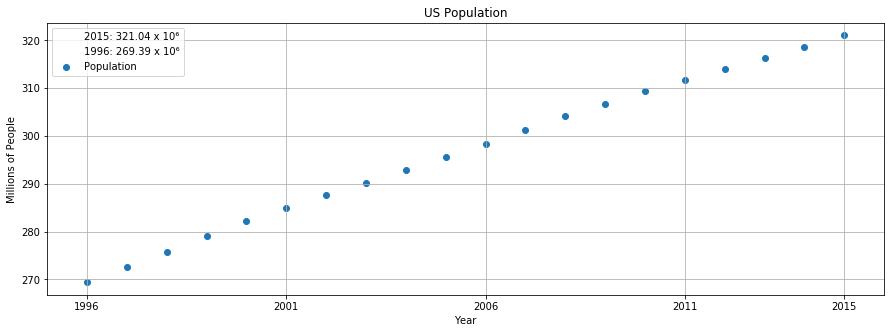

In [3]:
x = pop['Year']
y = pop['Value']

#Plot charts

plt.figure(figsize = (15, 5))
plt.scatter(x, y, label = 'Population')

plt.grid()
plt.xlim((1995, 2016))
plt.xticks([1996, 2001, 2006, 2011, 2015])
plt.title('US Population')
plt.xlabel('Year')
plt.ylabel('Millions of People')
plt.plot([], [],' ', label = '2015: ' + y[19].astype(str) + u' x 10\u2076')
plt.plot([], [],' ', label = '1996: ' + y[0].astype(str) + u' x 10\u2076') 
plt.legend(loc = 2)
plt.show()

An early idea for an analysis technique involves subtracting the linear fitted equation for population from the like equations for enteric bacteria. But analysis of the linear model for population showed that the model was not a valid fit (_cf._ section 6.1) and that idea was abandoned for simple scaling.

#### Isolated Enteric Bacteria by Year

###### The number of incidences of enteric bacteria are increasing by 142 cases per year (0.4 cases per million people). 

The incidences of enteric bacteria are increasing for both raw numbers and when scaled to population. The database does not include negative observations, so no conclusions on prevalence are drawn.

The increase in incidence appears to be free from the increase in population. But it still does not indicate increased risk. For example, the increase could be due to better monitoring systems, better publicity among clinicians, or an increase in resources.

A linear regression was performed in each case. On both charts, the blue dots are the plotted data, the blue dashed line is the fitted data, the light blue area is the confidence interval for the line, and the red dashed lines are the prediction intervals for the data. 

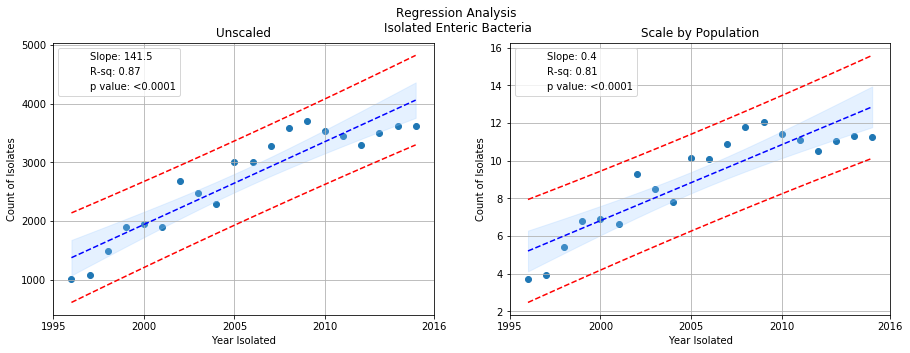

In [4]:
set_1 = s1.set_1(df, pop)
x = set_1['Data Year']
y = set_1['All Enteric']
z = set_1['All_per_MMcap']

rch.regression_4_by_4(x, y, z, cols = 2, rows = 1, 
                  suptitle = 'Isolated Enteric Bacteria', 
                  subtitle_0 = 'Unscaled', subtitle_1 = 'Scale by Population',
                  xmin = 1995, xmax = 2016, 
                  xticks = (1995, 2000, 2005, 2010, 2016),
                  xlabels = 'Year Isolated', ylabels = 'Count of Isolates')

 |Table 4.1.2-a| Set | Slope |Intercept|$R^{2}$ | p      |
|:------------|:----|:------|:--------|:-------|--------|
|             |Raw  | 141.5 |-281056.13|    0.87| <0.0001|
|             |Scaled| 0.4  |-799.04   |0.81    | <0.0001|

The data were modeled by ordinary least squares. The fitted line, confidence intervals, and prediction intervals were calculated from the models.

|Table 4.1.2-b|Set | Input | 95% Lower PI         | Prediction | 95% Lower PI       |
|:------------|:---|:------|:---------------------|:-----------|:-------------------|
|             |Raw | 2025  | 4584              |5477     |  6370           |
|             |Scaled | 2025  |  14            | 17       |   20             |

There is good evidence that a linear model fits the data, _cf._ sections 6.2 and 6.3.

#### Isolated Genera by Year

###### Each of the four bacterial genera are increasing by year over the period covered by the data.

Each of the four genera of enteric bacteria isolated in the monitoring program are increasing. _Salmonella_ has the largest number of incidences and is increasing at around 64 cases per year. _Campylobacter_ has somewhat less number of incidences and increases about the same rate, around 69 cases per year. _Shigella_ and _Escherichia_ have fewer incidences and lesser rates, around 0.4 and 14 respectively.

A linear regression was performed in each case. On all charts, the blue dots are the plotted data, the blue dashed line is the fitted data, the light blue area is the confidence interval for the line, and the red dashed lines are the prediction intervals for the data. 

The data were modeled by ordinary least squares. The fitted line, confidence intervals, and prediction intervals were calculated from the models.

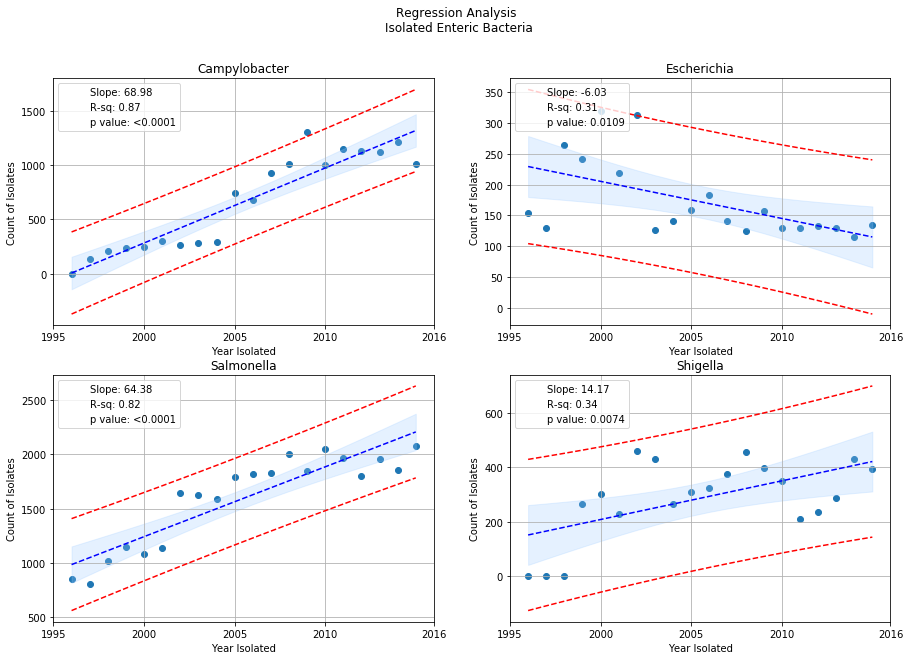

In [5]:
x = set_1['Data Year']
y1 = set_1['Campylobacter']
y2 = set_1['Escherichia']
y3 = set_1['Salmonella']
y4 = set_1['Shigella']


rch.regression_4_by_4(x, y1, y2, y3, y4, cols = 2, rows = 2, 
                  suptitle = 'Isolated Enteric Bacteria', 
                  subtitle_0 = 'Campylobacter', subtitle_1 = 'Escherichia',
                  subtitle_2 = 'Salmonella', subtitle_3 = 'Shigella',
                  xmin = 1995, xmax = 2016, 
                  xticks = (1995, 2000, 2005, 2010, 2016),
                  xlabels = 'Year Isolated', ylabels = 'Count of Isolates')

|Table 4.1.3-a| Set | Intercept | Slope | $R^{2}$ | p |
|:------------|:----|:----------|:------|:--------|:--|
|             |Campylobacter |-137682.27 |68.98|0.87|<0.0001|
|             |Escherichia|12267.07|-6.03|0.31|0.0109|
|             |Salmonella|-127514.02 |64.38|0.82|<0.0001|
|             |Shigella|-28126.91|14.17|0.34|0.0074|


The data were modeled by ordinary least squares. The fitted line, confidence intervals, and prediction intervals were calculated from the models.

|Table 4.1.3-b|Set | Input | 95% Lower PI         | Prediction | 95% Lower PI       |
|-------------|----|-------|----------------------|------------|--------------------|
|             |Campylobacter|2025 |1566|2008|2449|
|             |Escherichia | 2025  |0|55|201|
|             |Salmonella | 2025  |2356|2852|3347|
|             |Shignella | 2025  |239|563|887|

There is good evidence that a linear model fits the data, _cf._ sections 6.4 through 6.7.

#### Isolated Genera by Year per Million People

###### Each of the four bacterial genera are increasing by year over the period covered by the data.

Each of the four genera of enteric bacteria isolated in the monitoring program are increasing. _Salmonella_ has the largest number of incidences and is increasing at around 64 cases per year. _Campylobacter_ has somewhat less number of incidences and increases about the same rate, around 69 cases per year. _Shigella_ and _Escherichia_ have fewer incidences and lesser rates, around 0.4 and 14 respectively.

A linear regression was performed in each case. On all charts, the blue dots are the plotted data, the blue dashed line is the fitted data, the light blue area is the confidence interval for the line, and the red dashed lines are the prediction intervals for the data. 

The data were modeled by ordinary least squares. The fitted line, confidence intervals, and prediction intervals were calculated from the models.

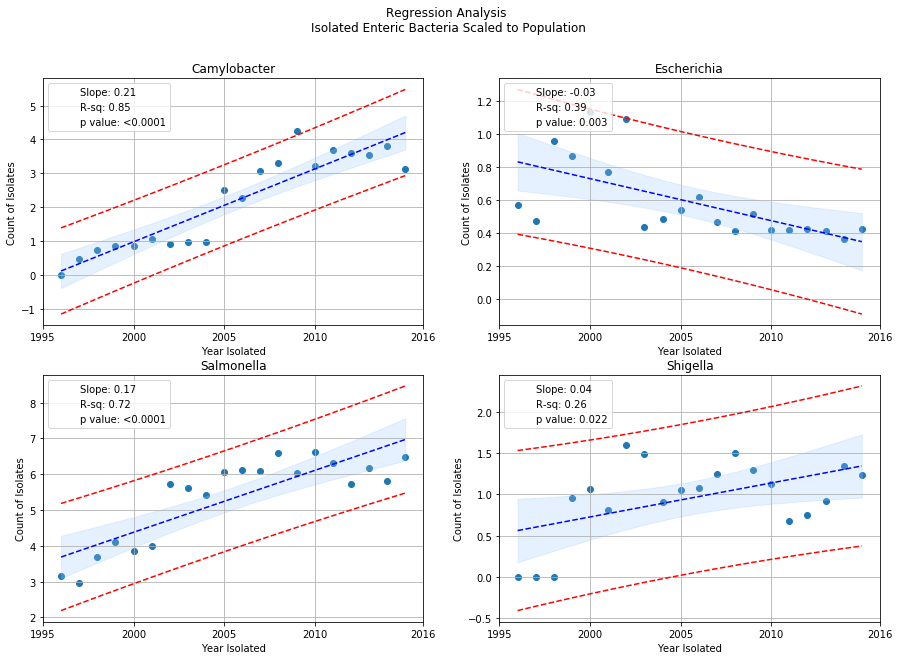

In [6]:
x = set_1['Data Year']
y1 = set_1['Campylobacter_per_MMcap']
y2 = set_1['Escherichia_per_MMcap']
y3 = set_1['Salmonella_per_MMcap']
y4 = set_1['Shigella_per_MMcap']

rch.regression_4_by_4(x, y1, y2, y3, y4, cols = 2, rows = 2, 
                  suptitle = 'Isolated Enteric Bacteria Scaled to Population', 
                  subtitle_0 = 'Camylobacter', subtitle_1 = 'Escherichia',
                  subtitle_2 = 'Salmonella', subtitle_3 = 'Shigella',
                  xmin = 1995, xmax = 2016, 
                  xticks = (1995, 2000, 2005, 2010, 2016),
                  xlabels = 'Year Isolated', ylabels = 'Count of Isolates')

|Table 4.1.4-a| Set | Intercept | Slope | $R^{2}$ | p |
|:------------|:----|:----------|:------|:--------|:--|
|             |Campylobacter |-427.75 |0.21|0.85|<0.0001|
|             |Escherichia|51.82|-0.03|0.39|0.003|
|             |Salmonella|-341.26|0.17|0.72|<0.0001|
|             |Shigella|-81.85|0.04|0.26|0.022|


The data were modeled by ordinary least squares. The fitted line, confidence intervals, and prediction intervals were calculated from the models.

|Table 5.1.2-b|Set | Input | 95% Lower PI         | Prediction | 95% Lower PI       |
|-------------|----|-------|----------------------|------------|--------------------|
|             |Campylobacter|2025 |5|6|8|
|             |Escherichia | 2025  |0|0|1|
|             |Salmonella | 2025  |7|9|10|
|             |Shignella | 2025  |1|2|3|

There is good evidence that a linear model fits the data, _cf._ sections 7.1.2 and 7.1.3.

###### Note: Scaling the data by US population does not change the trend or any conclusion from analysis. Data will not be scaled by population in the remaining analysis.

### Trends in Resistance

#### All Isolates by Year

######  The overall trend is increasings isolates and an increase in resistant bacteria over the last few years. 
###### Isolates may be tested against some or all of the 31 antibiotics in the study. 
Two chart types are shown below. The charts in the left column are scatter plots with regression analysis. The blue markers are the data points, the blue dashed line is the regression, the blue shaded area is the 95% confidence interval for the line, and the red dashed line is the 95% prediction interval for the data. The charts in the right column are proportion run charts. The blue markers and dashed line is the data and the red lines are the upper and lower control limit. The data is calculated by dividing the value of the resistance category by the total of all categories. On all charts, the x axis is year the specimen was assayed.

Susceptible indicates that the isolate was susceptible to a particular antimicrobial. Intermediates means that the isolate was moderately resistant, and resistant means that the isolate was completely resistant to a particular antimicrobial.  

In [7]:
set_2_All = rl.resistance_level(df, pop).get('set_2_All')

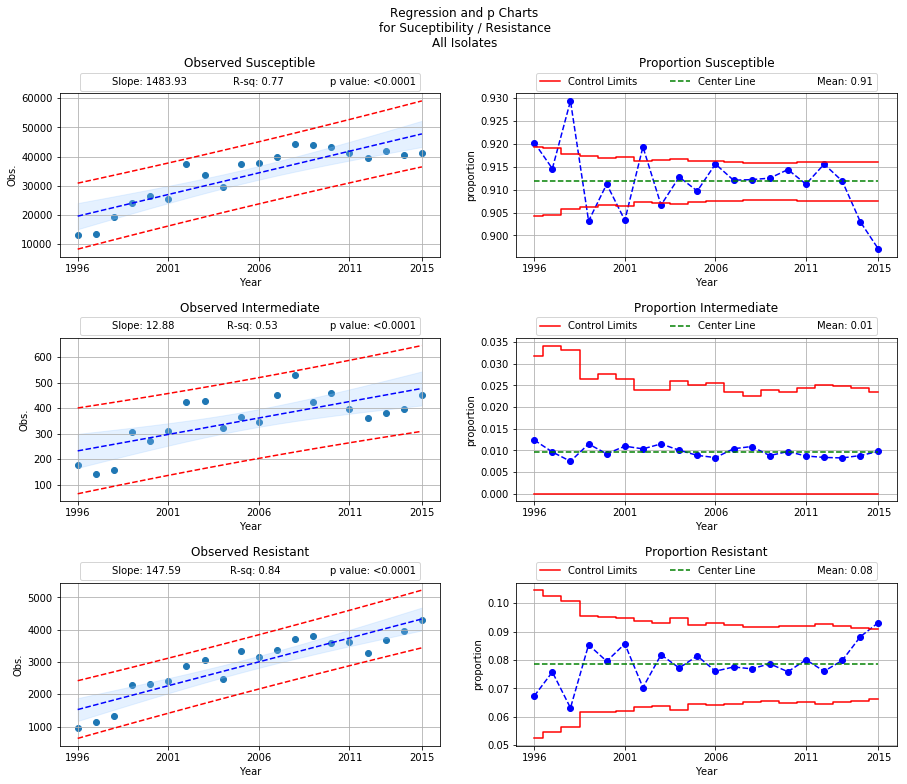

In [8]:
x = set_2_All['Data Year']
y1 = set_2_All['sum_S']
y2 = set_2_All['sum_I']
y3 = set_2_All['sum_R']

rp.regression_and_p_chart(x, y1, y2, y3, suptitle = 'All Isolates', 
                      subtitle_0 = 'Observed Susceptible', 
                      subtitle_1 = 'Proportion Susceptible', 
                      subtitle_2 = 'Observed Intermediate', 
                      subtitle_3 = 'Proportion Intermediate', 
                      subtitle_4 = 'Observed Resistant', 
                      subtitle_5 = 'Proportion Resistant',
                      xlabels_r = 'Year', xlabels_p = 'Year', 
                      xmin = 1995, xmax = 2016, 
                      xticks = (1996, 2001, 2006, 2011, 2015))

The last three years of the data set show an increasing proportion resistant bacteria and a corresponding decrease in susceptible bacteria.

#### _Campylobacter_

###### _Campylobacter_  has not shown an increase in resistance.
About 13% of the isolates were consistently resistant during the monitoring period. No intermediate resistant isolates were found.

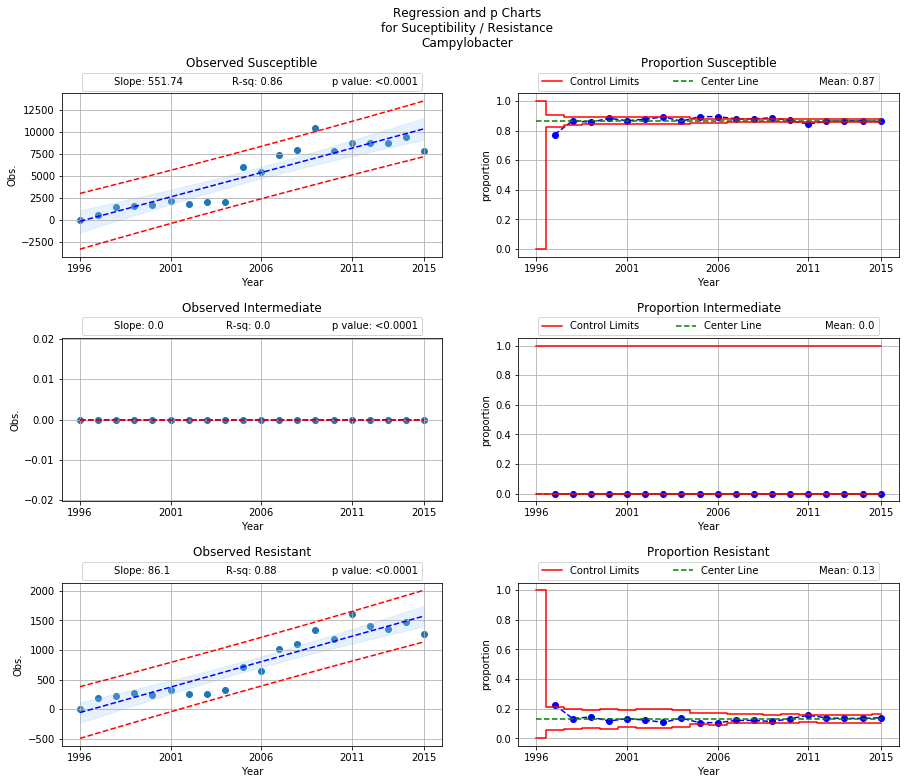

In [9]:
set_2_Ca = rl.resistance_level(df, pop).get('set_2_Ca')
x = set_2_Ca['Data Year']
y1 = set_2_Ca['sum_S']
y2 = set_2_Ca['sum_I']
y3 = set_2_Ca['sum_R']

rp.regression_and_p_chart(x, y1, y2, y3, suptitle = 'Campylobacter', 
                      subtitle_0 = 'Observed Susceptible', 
                      subtitle_1 = 'Proportion Susceptible', 
                      subtitle_2 = 'Observed Intermediate', 
                      subtitle_3 = 'Proportion Intermediate', 
                      subtitle_4 = 'Observed Resistant', 
                      subtitle_5 = 'Proportion Resistant',
                      xlabels_r = 'Year', xlabels_p = 'Year', 
                      xmin = 1995, xmax = 2016, 
                      xticks = (1996, 2001, 2006, 2011, 2015))

#### _Escherichia_

###### _Escherichia_  may be showing an increase in resistance.
_Escherichia_ may be increasing in resistance. The proportion of susceptible bacteria has decreased in the last few years of the period covered by the data, especially in 2015, the last year. Resistant bacteria have shown a corresponding increase.

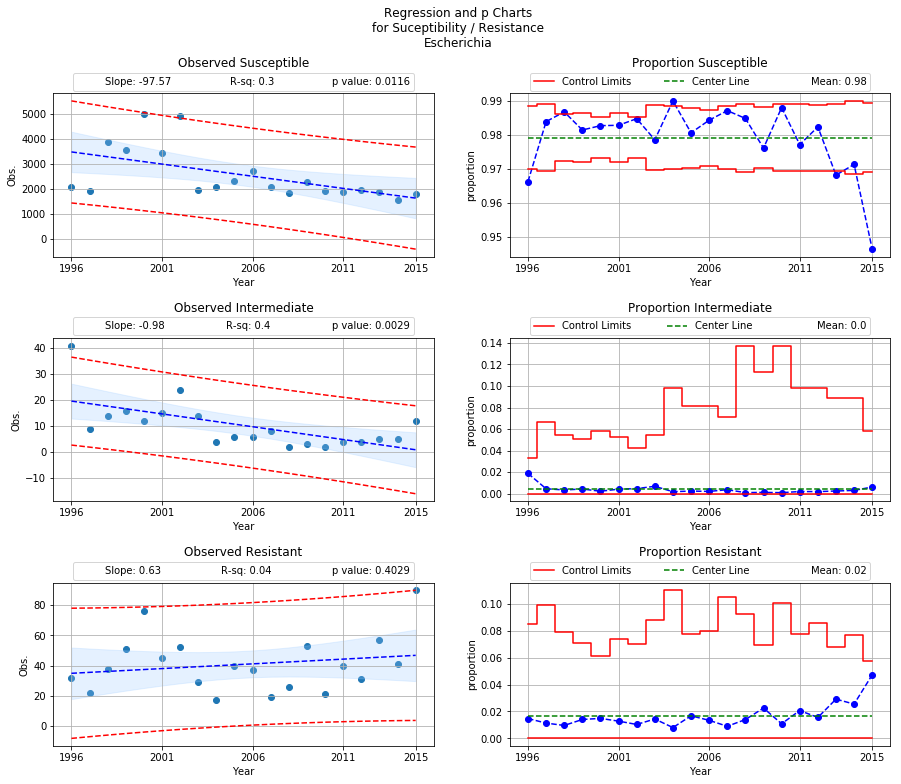

In [10]:
set_2_Es = rl.resistance_level(df, pop).get('set_2_Es')
x = set_2_Es['Data Year']
y1 = set_2_Es['sum_S']
y2 = set_2_Es['sum_I']
y3 = set_2_Es['sum_R']

rp.regression_and_p_chart(x, y1, y2, y3, suptitle = 'Escherichia', 
                      subtitle_0 = 'Observed Susceptible', 
                      subtitle_1 = 'Proportion Susceptible', 
                      subtitle_2 = 'Observed Intermediate', 
                      subtitle_3 = 'Proportion Intermediate', 
                      subtitle_4 = 'Observed Resistant', 
                      subtitle_5 = 'Proportion Resistant',
                      xlabels_r = 'Year', xlabels_p = 'Year', 
                      xmin = 1995, xmax = 2016, 
                      xticks = (1996, 2001, 2006, 2011, 2015))

#### _Salmonella_

###### Resistant  _Salmonella_  may be increasing.
In the last four years of the period covering the data, susceptible bacteria decrease and resistant bacteria have a corresponding increase.

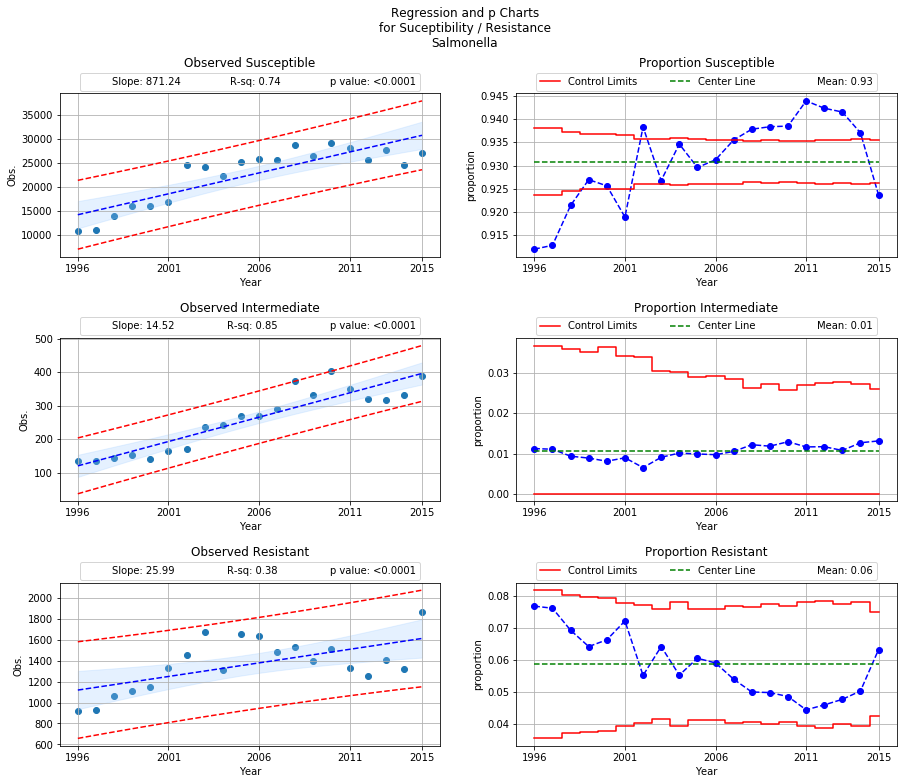

In [11]:
set_2_Sa = rl.resistance_level(df, pop).get('set_2_Sa')
x = set_2_Sa['Data Year']
y1 = set_2_Sa['sum_S']
y2 = set_2_Sa['sum_I']
y3 = set_2_Sa['sum_R']

rp.regression_and_p_chart(x, y1, y2, y3, suptitle = 'Salmonella', 
                      subtitle_0 = 'Observed Susceptible', 
                      subtitle_1 = 'Proportion Susceptible', 
                      subtitle_2 = 'Observed Intermediate', 
                      subtitle_3 = 'Proportion Intermediate', 
                      subtitle_4 = 'Observed Resistant', 
                      subtitle_5 = 'Proportion Resistant',
                      xlabels_r = 'Year', xlabels_p = 'Year', 
                      xmin = 1995, xmax = 2016, 
                      xticks = (1996, 2001, 2006, 2011, 2015))

#### _Shigella_

###### There have been little change in resistance for _Shigella_.
Over the period covering the data, resistance of _Shigella_ has remained constant.

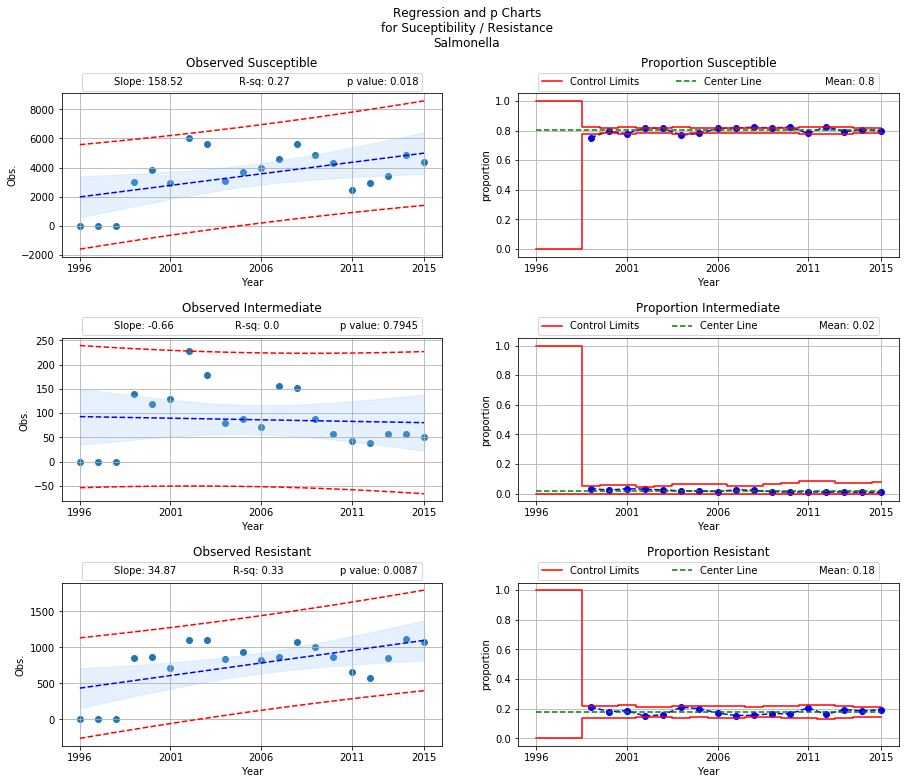

In [12]:
set_2_Sh = rl.resistance_level(df, pop).get('set_2_Sh')
x = set_2_Sh['Data Year']
y1 = set_2_Sh['sum_S']
y2 = set_2_Sh['sum_I']
y3 = set_2_Sh['sum_R']

rp.regression_and_p_chart(x, y1, y2, y3, suptitle = 'Salmonella', 
                      subtitle_0 = 'Observed Susceptible', 
                      subtitle_1 = 'Proportion Susceptible', 
                      subtitle_2 = 'Observed Intermediate', 
                      subtitle_3 = 'Proportion Intermediate', 
                      subtitle_4 = 'Observed Resistant', 
                      subtitle_5 = 'Proportion Resistant',
                      xlabels_r = 'Year', xlabels_p = 'Year', 
                      xmin = 1995, xmax = 2016, 
                      xticks = (1996, 2001, 2006, 2011, 2015))

### Comparisons of Categories

Resistant and intermediate resistant bacteria were compared to the region where isolated, patient age group, and culture source. Significant difference were found between the categories.

#### Resistance by Department of Health and Human Services (HHS) Regions

###### There are significant difference in the incidences of resistant and intermediate resistant bacteria for HHS regions.
Regions 4 and 5 (Mid-West and South) had the greatest incidences and regions 7 and 10 (The Plains states and Pacific Northwest including Alaska) had the least incidences.

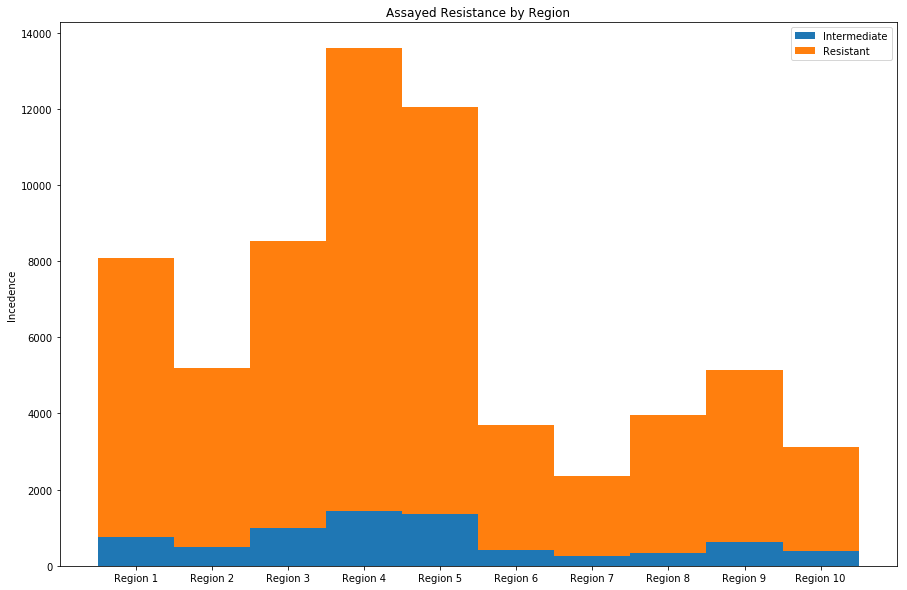

In [13]:
series_2_All_region = rl.resistance_level(df, pop).get('series_2_All_region')
plt.figure(figsize = (15, 10))
width = 1.0     # the width of the bars: can also be len(x) sequence
n = len(series_2_All_region)
ind = np.arange(n)
p1 = plt.bar(ind, series_2_All_region['sum_I'], width)
p2 = plt.bar(ind, series_2_All_region['sum_R'], width, \
             bottom = series_2_All_region['sum_I'])
plt.ylabel('Incedence')
plt.title('Assayed Resistance by Region')
plt.xticks(ind, ('Region 1', 'Region 2', 'Region 3', 'Region 4', 'Region 5', \
                 'Region 6', 'Region 7', 'Region 8', 'Region 9', 'Region 10'))
plt.legend( (p1[0], p2[0]), ( 'Intermediate', 'Resistant'))
plt.show()

In [14]:
stats.chisquare(series_2_All_region['sum_I'])

Power_divergenceResult(statistic=2303.0225352112675, pvalue=0.0)

In [15]:
stats.chisquare(series_2_All_region['sum_R'])

Power_divergenceResult(statistic=18184.93986424259, pvalue=0.0)

#### Resistance by Age Group

###### There are significant difference in the incidences of resistant and intermediate resistant bacteria for patient age group.
Patients of 0 to 4 years have the greatest incidences and patients 80 years or greater had the least.

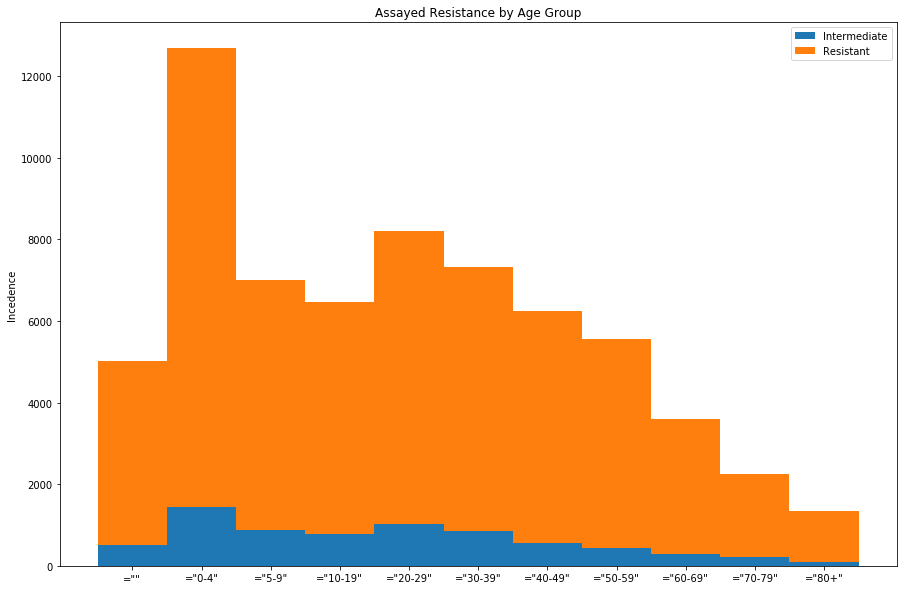

In [16]:
series_2_All_age = rl.resistance_level(df, pop).get('series_2_All_age')
plt.figure(figsize=(15, 10))
width = 1.0       # the width of the bars: can also be len(x) sequence
N = len(series_2_All_age)
ind = np.arange(N)
p3 = plt.bar(ind, series_2_All_age['sum_I'], width)
p4 = plt.bar(ind, series_2_All_age['sum_R'], width, \
             bottom = series_2_All_age['sum_I'])
plt.ylabel('Incedence')
plt.title('Assayed Resistance by Age Group')
plt.xticks(ind, ('=""', '="0-4"', '="5-9"', '="10-19"', '="20-29"',\
                 '="30-39"', '="40-49"', '="50-59"', '="60-69"', \
                 '="70-79"', '="80+"'))
plt.legend(( p3[0], p4[0]), ('Intermediate', 'Resistant'))
plt.show()

In [17]:
stats.chisquare(series_2_All_age['sum_I'])

Power_divergenceResult(statistic=2465.587605633803, pvalue=0.0)

In [18]:
stats.chisquare(series_2_All_age['sum_R'])

Power_divergenceResult(statistic=13664.087764778116, pvalue=0.0)

#### Resistance by Isolate Source

###### The majority of resistant bacteria were collected from stool.
As might be expected for enteric bacteria, the majority of isolates were collected from stool.

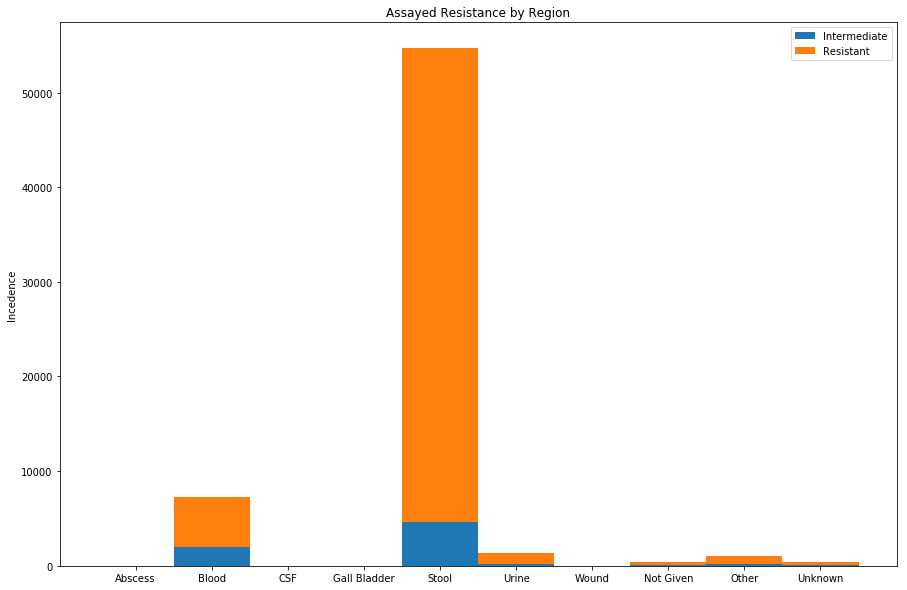

In [19]:
series_2_All_source = rl.resistance_level(df, pop).get('series_2_All_source')
plt.figure(figsize=(15,10))
width = 1.0      # the width of the bars: can also be len(x) sequence
N = len(series_2_All_source)
ind = np.arange(N)
p5 = plt.bar(ind, series_2_All_source['sum_I'], width)
p6 = plt.bar(ind, series_2_All_source['sum_R'], width, \
             bottom = series_2_All_source['sum_I'])
plt.ylabel('Incedence')
plt.title('Assayed Resistance by Region')
plt.xticks(ind, ('Abscess', 'Blood', 'CSF', 'Gall Bladder', 'Stool',\
                 'Urine', 'Wound', 'Not Given', 'Other', 'Unknown'))
plt.legend((p5[0], p6[0]), ('Intermediate', 'Resistant'))
plt.show()

In [20]:
stats.chisquare(series_2_All_source['sum_I'])

Power_divergenceResult(statistic=29290.832955832393, pvalue=0.0)

In [21]:
stats.chisquare(series_2_All_source['sum_R'])

Power_divergenceResult(statistic=376846.84418484796, pvalue=0.0)

## Discussion

The World Health Organization has found increase in antimicrobial resistance in every region of the world. Antimicrobial resistance contributes to 23,000 deaths per year in the US and 25,000 deaths per year in the EU. High proportion of resistance is found in all world regions. Overuse of antimicrobial drugs have led to the proliferation of resistant bacteria. The National Antimicrobial Resistance Monitoring System (NARMS) is a collaborative program of the US Food and Drug Administration (FDA), the Centers for Disease Control (CDC), US Department of Agriculture (USDA), and state and local public health departments. The program monitors the incidences of antimicrobial resistance in communicable and non-communicable bacteria from all transmission routes. The CDC has been tracking the incidences of enteric antimicrobial resistance since the mid 1990's.  The NARMS Enteric Bacteria database of the CDC was analyzed to determine if incidences of antimicrobial resistance are increasing in enteric bacteria and if any regional of demographic patterns emerge.
The data frame contains 54352 rows and 106 columns of specimens isolated from 1996 to 2015.The data includes specimen ID, bacterial ID information, region of US where the specimen was collected, the sample substrate, some genetic data, and resistance measures for 31 antimicrobial compounds. The data does not address the prevalence of resistance in the ecosystems, as specimens were only collected once a disease was observed. 
There are a few issues with the database that could affect conclusions. The monitoring program was initially rolled out to 14 states (1996 to 2002), though at least one state was included from each or 10 predefined regions. In 2003 the program was expanded nationwide. The process for collecting specimens started with an observation of enteric disease, no negative results, results that did not isolate bacteria were included in the data. 

## Appendix

Residuals from linear regression were tested for normality and random distribution by order and fit. 

### Residual Analysis of US Population

###### US Population does not fit a linear model.
The residuals do not likely fit a normal distribution. There is observable curvature in the Q-Q plot. The Anderson Darling test returns a p value less than 0.05. Finally, there is a significant pattern in residuals by order and residuals by fit.

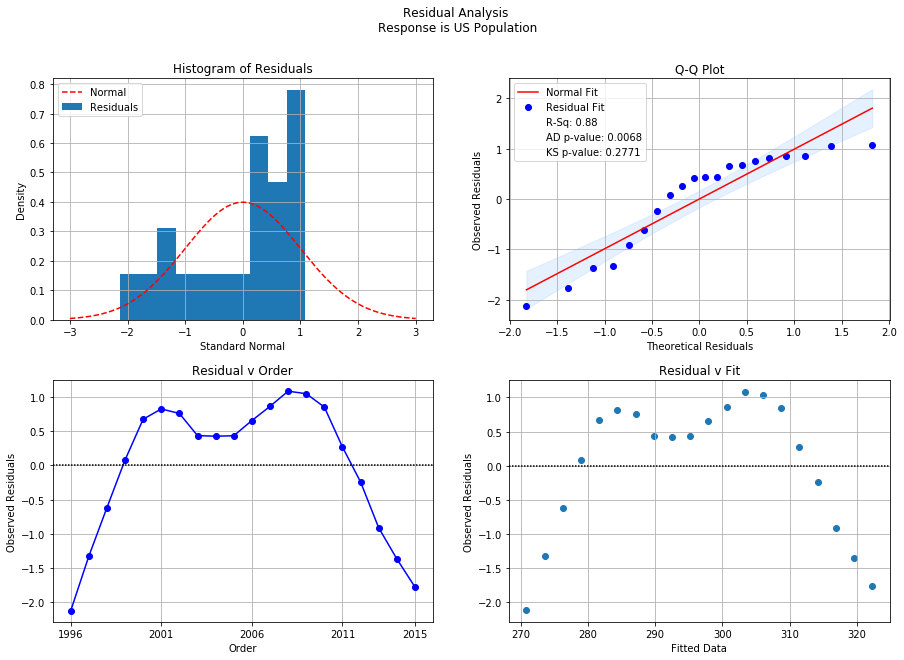

<Figure size 432x288 with 0 Axes>

In [22]:
x = pop['Year']
y = pop['Value']
d = 'norm'
response = 'US Population'

ra.residual_analysis(x, y, d, response)
plt.savefig('chart2.png')

### Residual Analysis - All Enteric Bacteria

###### All enteric bacteria meets the assumptions of linear regression.
Though there is some curvature in the residuals, there are more residuals around 1 and +1 standard deviations than near the center, the Anderson Darling test and Kolmogorov–Smirnov test have p values greater than 0.05.  Residuals against order and fit show no discernible pattern.

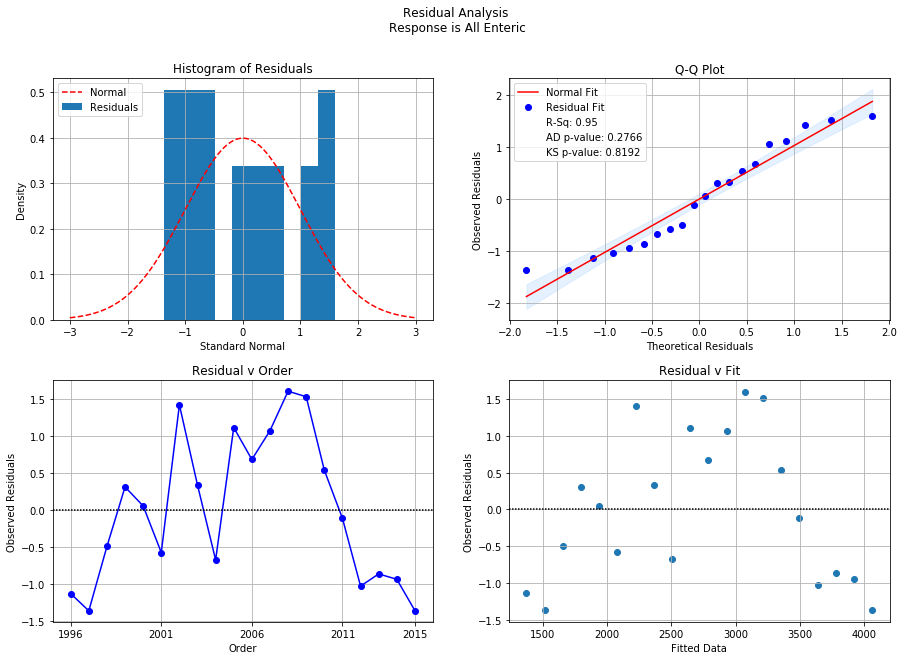

In [23]:
x = set_1['Data Year']
y = set_1['All Enteric']
d = 'norm'
response = 'All Enteric'

ra.residual_analysis(x, y, d, response)

### All Enteric by Million People

###### All enteric bacteria by million people meets the assumptions of linear regression.
Again there is a bit of curvature in the residuals, the Anderson Darling test and Kolmogorov–Smirnov test have p values greater than 0.05.  Residuals against order and fit show no discernible pattern.

As with the regression the residuals of the raw data look similar to the residuals of the scaled data. The number of enteric bacteria is not likely determined by US population.

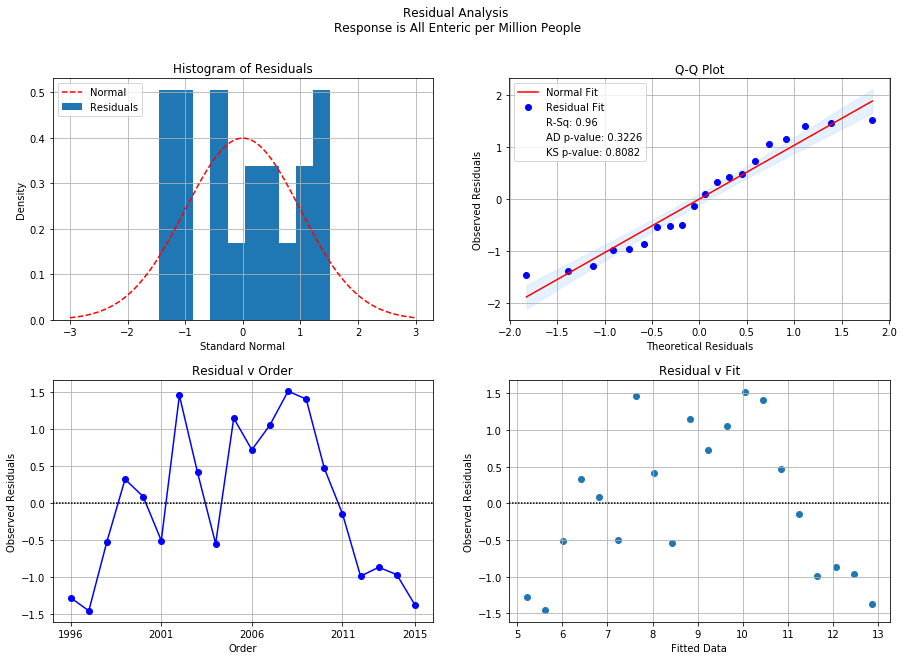

In [24]:
x = set_1['Data Year']
y = set_1['All_per_MMcap']
d = 'norm'
response = 'All Enteric per Million People'

ra.residual_analysis(x, y, d, response)

### _Campylobacter_

###### _Campylobacter_ meets the assumptions of linear regression.
The residuals are normal and well dispersed.

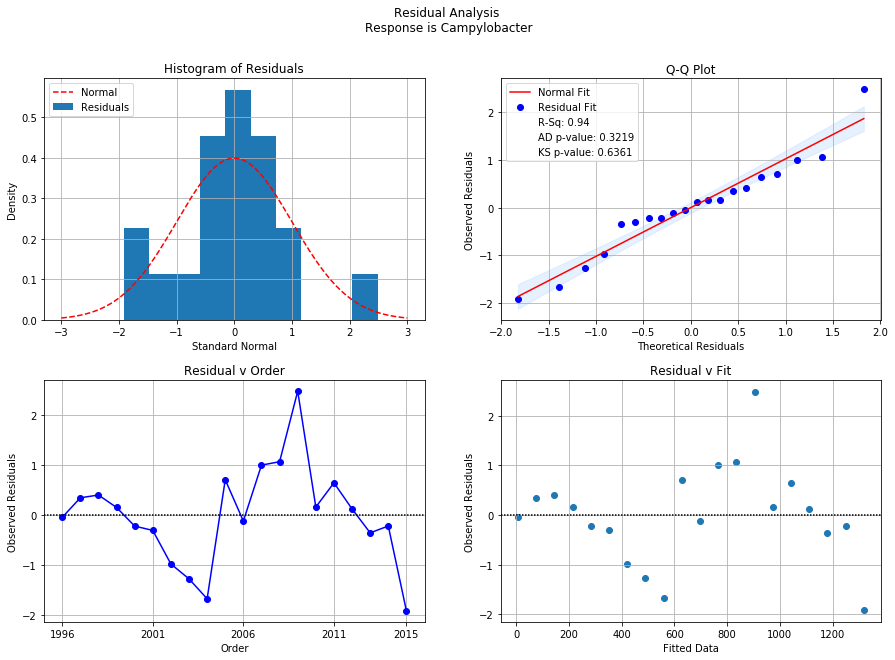

In [25]:
x = set_1['Data Year']
y = set_1['Campylobacter']
d = 'norm'
response = 'Campylobacter'

ra.residual_analysis(x, y, d, response)

### _Escherichia_ 

###### _Escherichia_ meets the assumptions of linear regression.
The residuals are normal and well dispersed.

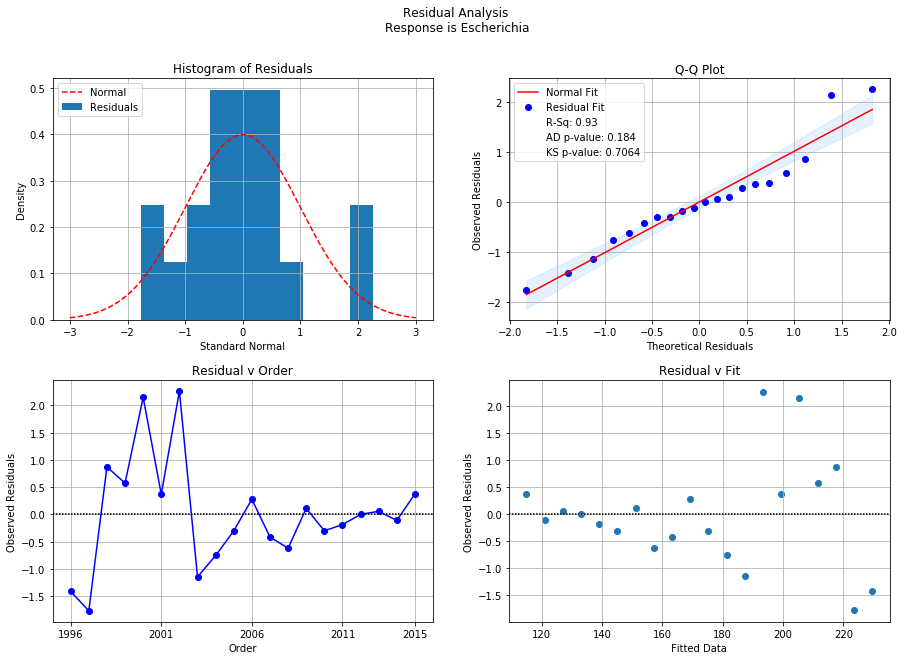

In [26]:
x = set_1['Data Year']
y = set_1['Escherichia']
d = 'norm'
response = 'Escherichia'

ra.residual_analysis(x, y, d, response)

### _Salmonella_

###### _Salmonella_ meets the assumptions of linear regression.
The residuals are normal and well dispersed.

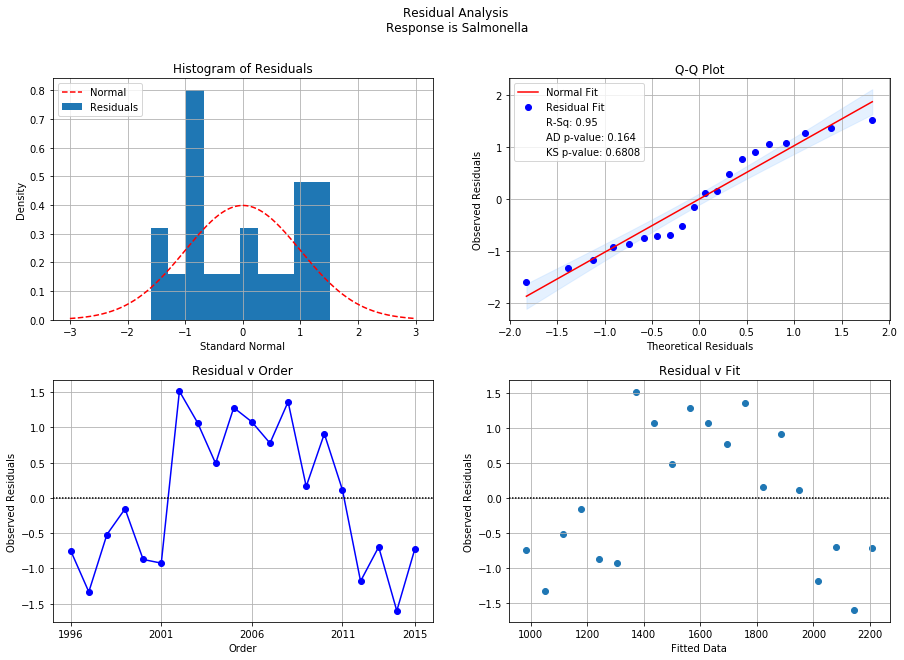

In [27]:
x = set_1['Data Year']
y = set_1['Salmonella']
d = 'norm'
response = 'Salmonella'

ra.residual_analysis(x, y, d, response)

### _Shigella_

###### _Shigella_ meets the assumptions of linear regression.
The residuals are normal and well dispersed.

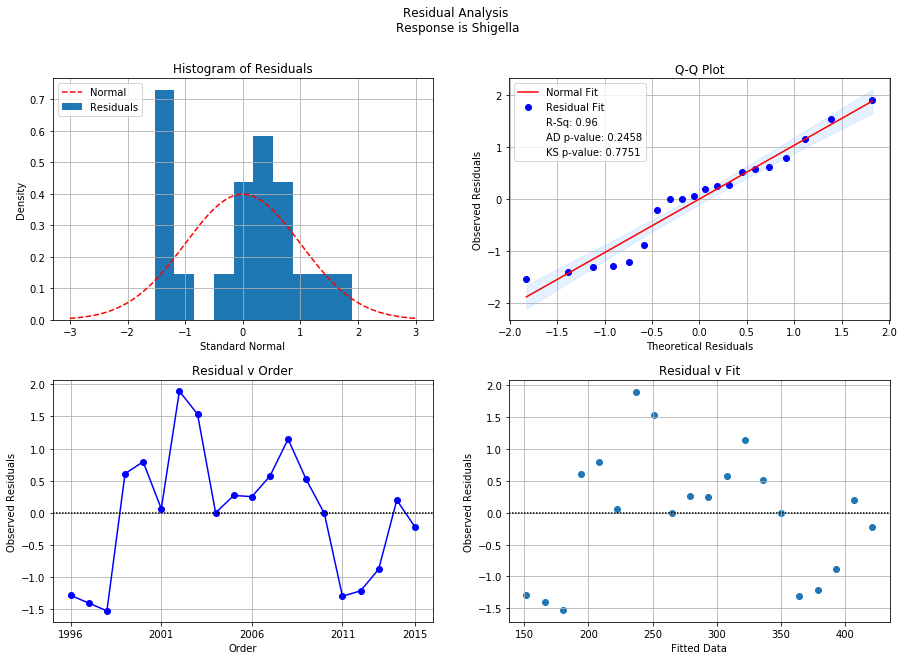

In [28]:
x = set_1['Data Year']
y = set_1['Shigella']
d = 'norm'
response = 'Shigella'

ra.residual_analysis(x, y, d, response)